   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40
(200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000     

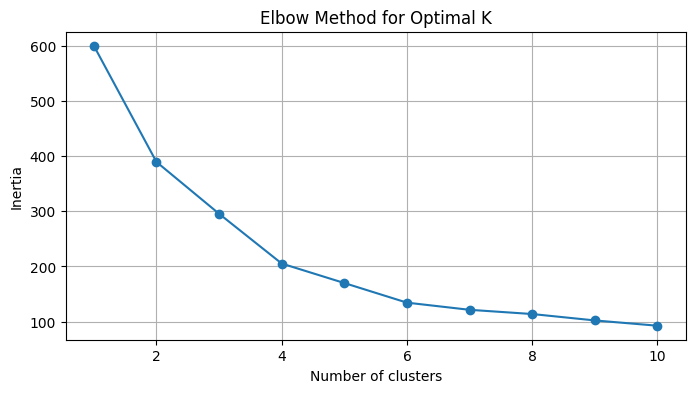

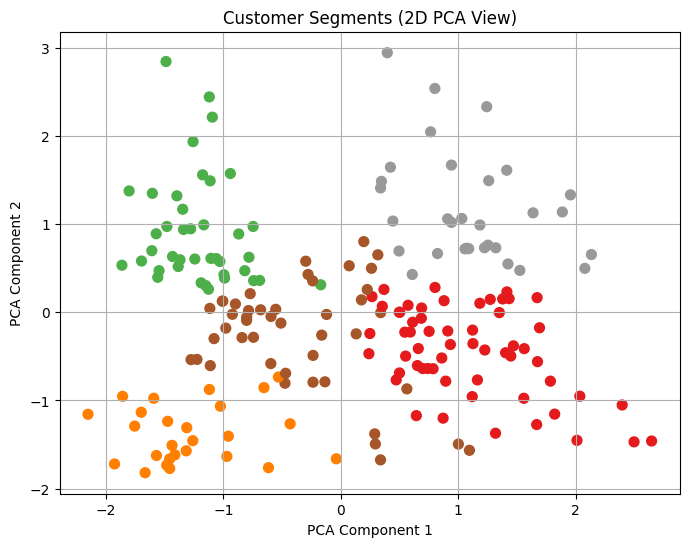

         Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                               
0           0.0  55.275862           47.620690               41.706897
1           0.0  32.875000           86.100000               81.525000
2           0.0  25.769231           26.115385               74.846154
3           0.0  26.733333           54.311111               40.911111
4           0.0  44.387097           89.774194               18.483871


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

data = pd.read_csv("/content/Mall_Customers.csv")
data.drop(['CustomerID'],axis=1,inplace=True)
print(data.head())
print(data.shape)
print(data.info())
print(data.describe())

data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 0})

data.isnull().sum()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

inertia = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_data)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data['Cluster'] = clusters

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='Set1', s=50)
plt.title('Customer Segments (2D PCA View)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

summary = data.groupby('Cluster').mean()
print(summary)